In [1]:
!pip3 install fasttext
!pip3 install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296184 sha256=6c16d4666e2307225013746869f89e14728e6a0e4e9d613a4bfd0edc3cfa854a
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [2]:


!git clone https://github.com/AI4Bharat/IndicLID.git
%cd "/content/IndicLID/Inference"
%mkdir models
%cd "/content/IndicLID/Inference/models"


!wget https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-bert.zip
!wget https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-ftn.zip
!wget https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-ftr.zip
!unzip indiclid-bert.zip
!unzip indiclid-ftn.zip
!unzip indiclid-ftr.zip


# %cd "/content/IndicLID/"
%cd "/content/IndicLID/"
%mkdir train_data
%cd "/content/IndicLID/train_data"

Cloning into 'IndicLID'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (337/337), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 337 (delta 148), reused 282 (delta 115), pack-reused 0 (from 0)
Receiving objects: 100% (337/337), 201.63 KiB | 1.13 MiB/s, done.
Resolving deltas: 100% (148/148), done.
/content/IndicLID/Inference
/content/IndicLID/Inference/models
--2024-11-15 04:51:28--  https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-bert.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/605931363/efa054ba-62f1-46d2-90b0-71f339a2cd33?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20241115%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20241115T045129Z&X-Amz-Expires=300&X-Amz-Signature=1

In [3]:
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/as.txt | head -n 10000 > as.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/bd.txt | head -n 10000 > bd.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/bn.txt | head -n 10000 > bn.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/en.txt | head -n 10000 > en.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/gom.txt | head -n 10000 > gom.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/gu.txt | head -n 10000 > gu.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/hi.txt | head -n 10000 > hi.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/kn.txt | head -n 10000 > kn.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ks.txt | head -n 10000 > ks.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/mai.txt | head -n 10000 > mai.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ml.txt | head -n 10000 > ml.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/mni.txt | head -n 10000 > mni.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/mr.txt | head -n 10000 > mr.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ne.txt | head -n 10000 > ne.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/or.txt | head -n 10000 > or.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/pa.txt | head -n 10000 > pa.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/sa.txt | head -n 10000 > sa.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/sd.txt | head -n 10000 > sd.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ta.txt | head -n 10000 > ta.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/te.txt | head -n 10000 > te.txt
!curl -s https://objectstore.e2enetworks.net/ai4b-public-nlu-nlg/indic-corp-frozen-for-the-paper-oct-2022/ur.txt | head -n 10000 > ur.txt

NATIVE DATA

In [4]:
%cd /content/IndicLID/train_data


/content/IndicLID/train_data


In [5]:
lang_code_dict_ntv = {
    'as' : 'asm_Beng',
    'bn' : 'ben_Beng',
    'bd' : 'brx_Deva',
    'gom' : 'kok_Deva',
    'gu' : 'guj_Gujr',
    'hi' : 'hin_Deva',
    'kn' : 'kan_Knda',
	'ks' : 'kas_Arab',
    'mai': 'mai_Deva',
    'ml' : 'mal_Mlym',
	'mni' : 'mni_Meti',
    'mr' : 'mar_Deva',
    'ne' : 'nep_Deva',
    'or' : 'ori_Orya',
    'pa' : 'pan_Guru',
    'sa' : 'san_Deva',
    'sd' : 'snd_Arab',
    'ta' : 'tam_Tamil',
    'te' : 'tel_Telu',
    'ur' : 'urd_Arab',
    'en' : 'English',
}

for code, lang in lang_code_dict_ntv.items():

	# Traverse the file line by line and transliterate
	file_path = f"/content/IndicLID/train_data/{code}.txt"
	output_file_path = f"/content/IndicLID/train_data/{code}ntv_train.txt"
	output_file = open(output_file_path, 'w', encoding='utf-8')
	i=0
	# Read the file and transliterate each line
	with open(file_path, 'r', encoding='utf-8') as file:
		for line in file:
			if(i<20000):

				# Strip any whitespace or newline characters from the line
				line = line.strip()
				i += 1

				# Transliterate the line using the engine
				if line:  # Ensure it's not an empty line
					output_file.write(f"__label__{lang} {line}\n")
					#print(f"Input: {line}")
					#print(f"__label__{lang} {output}")

	output_file.close()  # Manually closing the file after the loop





In [6]:
%cd /content/IndicLID
%mkdir train
%mkdir valid


/content/IndicLID


In [7]:
%cd /content/IndicLID/train_data
import os
from sklearn.model_selection import train_test_split

# List all files in the current directory that end with "ntv_train.txt"
all_files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith("ntv_train.txt")]

# Traverse through each file
for file_name in all_files:
    with open(file_name, 'r') as file:
        data = file.read()
        lines = data.splitlines()

        # Only proceed if lines are not empty
        if lines:
            train_lines, valid_lines = train_test_split(lines, test_size=0.2, random_state=42)

            # Write the training data to a new file
            train_file_name = f"../train/{file_name}"
            with open(train_file_name, 'w') as train_file:
                train_file.write("\n".join(train_lines))

            # Write the validation data to a new file
            valid_file_name = f"../valid/{file_name}"
            with open(valid_file_name, 'w') as valid_file:
                valid_file.write("\n".join(valid_lines))
        else:
            print(f"Skipping empty file: {file_name}")


/content/IndicLID/train_data


In [8]:
import fasttext
model = fasttext.load_model('/content/IndicLID/Inference/models/indiclid-ftn/model_baseline_roman.bin')

In [9]:
%cd /content/IndicLID/train
!cat *train.txt > train_combine.txt

%cd /content/IndicLID/valid
!cat *train.txt > test_combine.txt

/content/IndicLID/train
/content/IndicLID/valid


In [10]:
train_data= f"/content/IndicLID/train/train_combine.txt"
print(train_data)
model = fasttext.train_supervised(
    input = train_data,
    lr = 0.3,
    dim = 512,
    ws = 5,
    epoch = 3,
    minCount = 1,
    minCountLabel = 0,
    minn = 3,
    maxn = 6,
    neg = 5,
    wordNgrams = 2,
    loss = 'hs',
    lrUpdateRate = 100,
    t = 0.0001,
    verbose = 1
    )



/content/IndicLID/train/train_combine.txt


In [11]:
%cd "/content/IndicLID/"
%mkdir finetuned
model.save_model("/content/IndicLID/finetuned/model_baseline_native.bin")

/content/IndicLID


ROMAN DATA

In [1]:
%cd /content/IndicLID
%mkdir results
%mkdir results_ntv
!cp /content/IndicLID/valid/test_combine.txt /content/test_combine.txt

/content/IndicLID
mkdir: cannot create directory ‘results’: File exists
mkdir: cannot create directory ‘results_ntv’: File exists


In [21]:
import csv
import sys
import fasttext

IndicPath='/content/IndicLID/Inference/models/indiclid-ftn/model_baseline_roman.bin'
FinetunePathntv='/content/IndicLID/finetuned/model_baseline_native.bin'
model = fasttext.load_model(FinetunePathntv)

file = open('/content/IndicLID/results_ntv/result.txt', 'w')

lines_config = []

lines_config.append('lr : ' + str ( model.f.getArgs().lr ) )
lines_config.append('dim : ' + str ( model.f.getArgs().dim ) )
lines_config.append('ws : ' + str ( model.f.getArgs().ws ) )
lines_config.append('epoch : ' + str ( model.f.getArgs().epoch ) )
lines_config.append('minCount : ' + str ( model.f.getArgs().minCount ) )
lines_config.append('minCountLabel : ' + str ( model.f.getArgs().minCountLabel ) )
lines_config.append('minn : ' + str ( model.f.getArgs().minn ) )
lines_config.append('maxn : ' + str ( model.f.getArgs().maxn ) )
lines_config.append('neg : ' + str ( model.f.getArgs().neg ) )
lines_config.append('wordNgrams : ' + str ( model.f.getArgs().wordNgrams ) )
lines_config.append('loss : ' + str ( model.f.getArgs().loss ) )
lines_config.append('bucket : ' + str ( model.f.getArgs().bucket ) )
lines_config.append('thread : ' + str ( model.f.getArgs().thread ) )
lines_config.append('lrUpdateRate : ' + str ( model.f.getArgs().lrUpdateRate ) )
lines_config.append('t : ' + str ( model.f.getArgs().t ) )
lines_config.append('label : ' + str ( model.f.getArgs().label ) )
lines_config.append('verbose : ' + str ( model.f.getArgs().verbose ) )
lines_config.append('pretrainedVectors : ' + str ( model.f.getArgs().pretrainedVectors ) )




file.write('Hyperparameters (Tuned)')
file.write('\n')
file.write('\n'.join(lines_config))
file.write('\n\n\n\n\n')



result_train = model.test("/content/test_combine.txt")

file.write('Evaluation Results Train Set')
file.write('\n')
file.write('train Set')
file.write('\n')
file.write('Samples : ' + str(result_train[0]) )
file.write('\n')
file.write('precision : ' + str(result_train[1]) )
file.write('\n')
file.write('recall : ' + str(result_train[2]) )
file.write('\n')
file.write('F1-Score : ' + str( (2 * result_train[1] * result_train[2]) / (result_train[1] + result_train[2]) ) )
file.write('\n\n\n')


confusion_matrix_reverse_mapping  = {
    0 : 'Assamese',
    1 : 'Bangla',
    2 : 'Bodo',
    3 : 'Konkani',
    4 : 'Gujarati',
    5 : 'Hindi',
    6 : 'Kannada',
    7 : 'Kashmiri',
    22 : 'Kashmiri_Deva',
    8 : 'Maithili',
    9 : 'Malayalam',
    23 : 'Manipuri_Mei',
    10 : 'Manipuri',
    11 : 'Marathi',
    12 : 'Nepali',
    13 : 'Oriya',
    14 : 'Punjabi',
    15 : 'Sanskrit',
    16 : 'Sindhi',
    17 : 'Tamil',
    18 : 'Telugu',
    19 : 'Urdu',
    20 : 'English',
    21 : 'Other'
}

confusion_matrix_mapping  = {
    'Assamese' : 0,
    'Bangla' : 1,
    'Bodo' : 2,
    'Konkani' : 3,
    'Gujarati' : 4,
    'Hindi' : 5,
    'Kannada' : 6,
    'Kashmiri' : 7,
    'Kashmiri_Deva' : 22,
    'Maithili' : 8,
    'Malayalam' : 9,
    'Manipuri' : 10,
    'Manipuri_Mei' : 23,
    'Marathi' : 11,
    'Nepali' : 12,
    'Oriya' : 13,
    'Punjabi' : 14,
    'Sanskrit' : 15,
    'Sindhi' : 16,
    'Tamil' : 17,
    'Telugu' : 18,
    'Urdu' : 19,
    'English' : 20,
    'Other' : 21
}

IndicLID_lang_code_dict = {
    'asm_Beng' : 0,
    'ben_Beng' : 1,
    'brx_Deva' : 2,
    'kok_Deva' : 3,
    'guj_Gujr' : 4,
    'hin_Deva' : 5,
    'kan_Knda' : 6,
    'kas_Arab' : 7,
    'kas_Deva' : 22,
    'mai_Deva' : 8,
    'mal_Mlym' : 9,
    'mni_Meti' : 10,
    'mni_Beng' : 23,
    'mar_Deva' : 11,
    'nep_Deva' : 12,
    'ori_Orya' : 13,
    'pan_Guru' : 14,
    'san_Deva' : 15,
    'snd_Arab' : 16,
    'tam_Tamil': 17,
    'tel_Telu' : 18,
    'urd_Arab' : 19,
    'eng_Latn' : 20,
    'other'    : 21,
    'doi_Deva' : 21,
    'sat_Olch' : 21,
    'English' : 20,
    'Other' : 21
}

IndicLID_lang_code_dict_reverse = {
     0  : 'asm_Beng' ,
     1  : 'ben_Beng' ,
     2  : 'brx_Deva' ,
     3  : 'kok_Deva' ,
     4  : 'guj_Gujr' ,
     5  : 'hin_Deva' ,
     6  : 'kan_Knda' ,
     7  : 'kas_Arab' ,
     22  : 'kas_Deva' ,
     8  : 'mai_Deva' ,
     9  : 'mal_Mlym' ,
     10 : 'mni_Meti' ,
     23 : 'mni_Beng' ,
     11 : 'mar_Deva' ,
     12 : 'nep_Deva' ,
     13 : 'ori_Orya' ,
     14 : 'pan_Guru' ,
     15 : 'san_Deva' ,
     16 : 'snd_Arab' ,
     17 : 'tam_Tamil',
     18 : 'tel_Telu' ,
     19 : 'urd_Arab' ,
     20 : 'eng_Latn' ,
     21 : 'other'    ,
	 }


def evaluate(test_file_name):

    classes = 23

    # inference for Dakshina, test_combine_dakshina
    file_test = open('/content/'+test_file_name+'.txt', 'r')
    lines_test = file_test.read().split('\n')
    file_test.close()


    # save predictions
    file_predictions = open('/content/IndicLID/results_ntv/predictions_'+test_file_name+'.csv', 'w')
    csv_writer_predictions = csv.writer(file_predictions)
    csv_writer_predictions.writerow( [ 'Sentence', 'Ground truth', 'Prediction', 'Score' ] )

    file_predictions_right = open('/content/IndicLID/results_ntv/right_predictions_'+test_file_name+'.csv', 'w')
    csv_writer_predictions_right = csv.writer(file_predictions_right)
    csv_writer_predictions_right.writerow( [ 'Sentence', 'Ground truth', 'Prediction', 'Score' ] )


    file_predictions_wrong = open('/content/IndicLID/results_ntv/wrong_predictions_'+test_file_name+'.csv', 'w')
    csv_writer_predictions_wrong = csv.writer(file_predictions_wrong)
    csv_writer_predictions_wrong.writerow( [ 'Sentence', 'Ground truth', 'Prediction', 'Score' ] )



    # Computing confusion matrix
    confusion_matrix = []
    for i in range(classes):
        confusion_matrix.append( [0]*classes )

    # to calculate accuracy and save right and wrong prediction
    count = 0
    n = 0
    for line in lines_test:
        label = line.split(' ')[0]
        sen = ' '.join(line.split(' ')[1:])
        pred_label = model.predict(sen)[0][0]
        pred_score = model.predict(sen)[1][0]

        if pred_label == label:
            count+=1
            csv_writer_predictions_right.writerow( [ sen, label, pred_label, pred_score ] )
        else:
            csv_writer_predictions_wrong.writerow( [ sen, label, pred_label, pred_score ] )
        n+=1
        #print("This is label : "+label)
        #print("This is label : "+pred_label)


        if len(label[9:])>0:
          print("This file label : "+label[9:])
          print(IndicLID_lang_code_dict[label[9:]] )
          print("This model label : "+pred_label[9:])
          print(IndicLID_lang_code_dict[pred_label[9:]] )
          confusion_matrix[ IndicLID_lang_code_dict[label[9:]] ][ IndicLID_lang_code_dict[pred_label[9:]] ] += 1
          csv_writer_predictions.writerow( [ sen, label, pred_label, pred_score ] )




    # Computing precision, recall and f1
    precsison_recall_f1 = []
    for i in range(classes):
        precsison_recall_f1.append([0] * 3)

    precision_denominator = 0
    recall_denominator = 0
    f1_denominator = 0

    for i in range(classes):
        no_of_correctly_predicted = confusion_matrix[i][i]
        total_predictions_as_i = 0

        precision = 0
        recall = 0
        f1_value = 0

        # true predicted i values out of all predicted i values
        for j in range(classes):
            total_predictions_as_i += confusion_matrix[j][i]
        if (total_predictions_as_i != 0):
            precision = no_of_correctly_predicted/total_predictions_as_i
            precision_denominator += 1

        # true predicted i values out of all actual i values
        total_actual_values_of_i = sum(confusion_matrix[i])
        if (total_actual_values_of_i != 0):
            recall = no_of_correctly_predicted/total_actual_values_of_i
            recall_denominator += 1

        # f1 score
        if (precision + recall != 0):
            f1_value = (2 * precision * recall) / (precision + recall)
            f1_denominator += 1

        precsison_recall_f1[i][0] = precision
        precsison_recall_f1[i][1] = recall
        precsison_recall_f1[i][2] = f1_value

    avg_precision = sum([precsison_recall_f1[i][0] for i in range(classes)]) / precision_denominator
    avg_recall = sum([precsison_recall_f1[i][1] for i in range(classes)]) / recall_denominator
    avg_f1_score = sum([precsison_recall_f1[i][2] for i in range(classes)]) / f1_denominator



    # to save confusion matrix and precision recall matrix

    for i in range(classes):
        precsison_recall_f1[i].insert(0, confusion_matrix_reverse_mapping[i])

    precsison_recall_f1.insert( 0, ['', 'precision', 'recall', 'f1'])
    precsison_recall_f1.append( ['Avg', avg_precision, avg_recall, avg_f1_score] )


    file_precision_recall_f1 = open('/content/IndicLID/results_ntv/precision_recall_f1_'+test_file_name+'.csv', 'w')
    precision_recall_f1_csv_writer = csv.writer(file_precision_recall_f1)

    for i in range(classes+2):
        precision_recall_f1_csv_writer.writerow(precsison_recall_f1[i])
    file_precision_recall_f1.close()



    # save confusion matrix
    for i in range(classes):
        confusion_matrix[i].insert(0, confusion_matrix_reverse_mapping[i] )

    confusion_matrix.insert( 0, [''] + [confusion_matrix_reverse_mapping[i] for i in range(classes)] )


    file_confusion_matrix = open('/content/IndicLID/results_ntv/confusion_matrix_'+test_file_name+'.csv', 'w')
    confusion_matrix_csv_writer = csv.writer(file_confusion_matrix)

    for i in range(classes+1):
        confusion_matrix_csv_writer.writerow(confusion_matrix[i])


    file_confusion_matrix.close()
    file_predictions.close()
    file_predictions_right.close()
    file_predictions_wrong.close()




    # fasttext evaluation scores
    test_acc = count/n
    result_test = model.test('/content/test_combine.txt')
    file.write('fasttext evaluation scores - ' + test_file_name + '\n')
    file.write('Samples : ' + str(result_test[0]) + '\n')
    file.write('precision : ' + str(result_test[1]) + '\n')
    file.write('recall : ' + str(result_test[2]) + '\n')
    file.write('F1-Score : ' + str( (2 * result_test[1] * result_test[2]) / (result_test[1] + result_test[2]) ) + '\n')
    file.write('Accuracy : ' + str(test_acc) + '\n')
    file.write('\n\n\n')

evaluate('test_combine')

file.close()

Streaming output truncated to the last 5000 lines.
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : asm_Beng
0
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This model label : tel_Telu
18
This file label : tel_Telu
18
This 

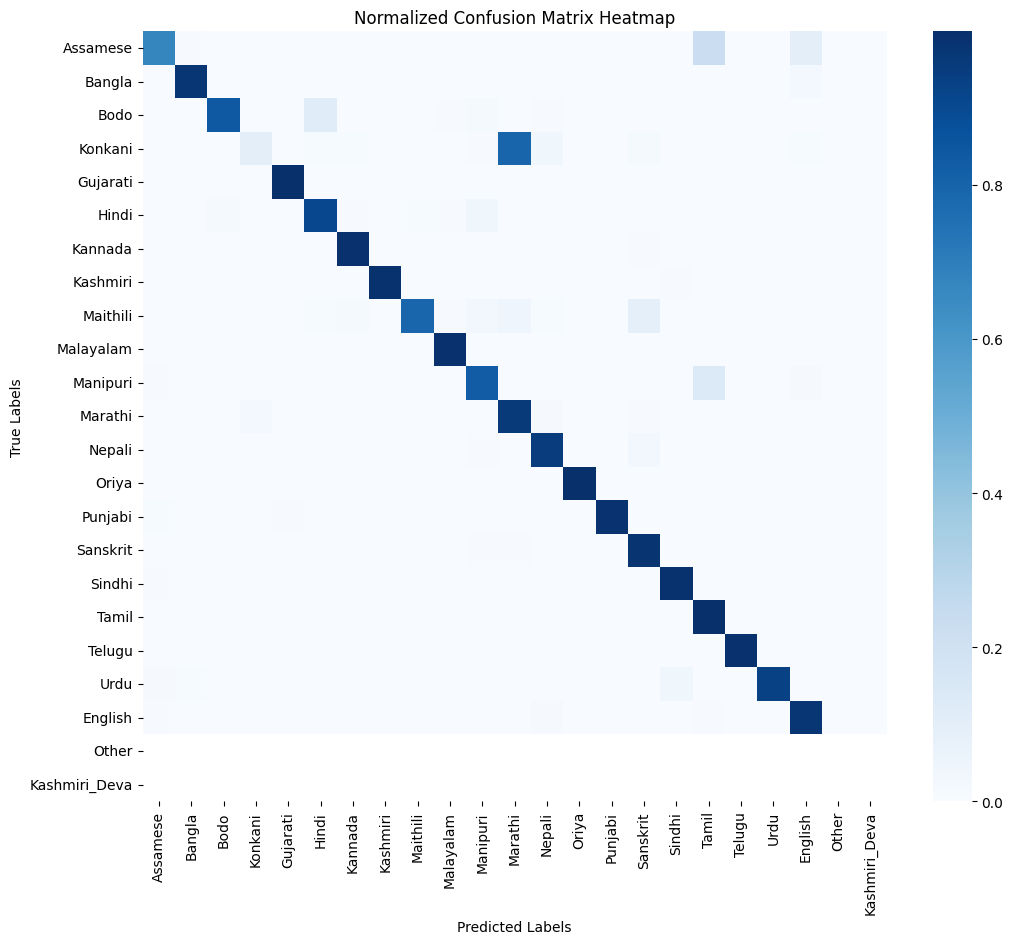

In [22]:
# Row normalization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the confusion matrix from a CSV file
file_path = '/content/IndicLID/results_ntv/confusion_matrix_test_combine.csv'  # Update with your file path
confusion_matrix_df = pd.read_csv(file_path)

# Convert the dataframe to set the first column as an index (assuming it contains row labels)
confusion_matrix = confusion_matrix_df.set_index(confusion_matrix_df.columns[0])

confusion_matrix_row_norm = confusion_matrix.div(confusion_matrix.sum(axis=1), axis=0)

plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix_row_norm, annot=False, cmap="Blues", cbar=True)
plt.title("Normalized Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


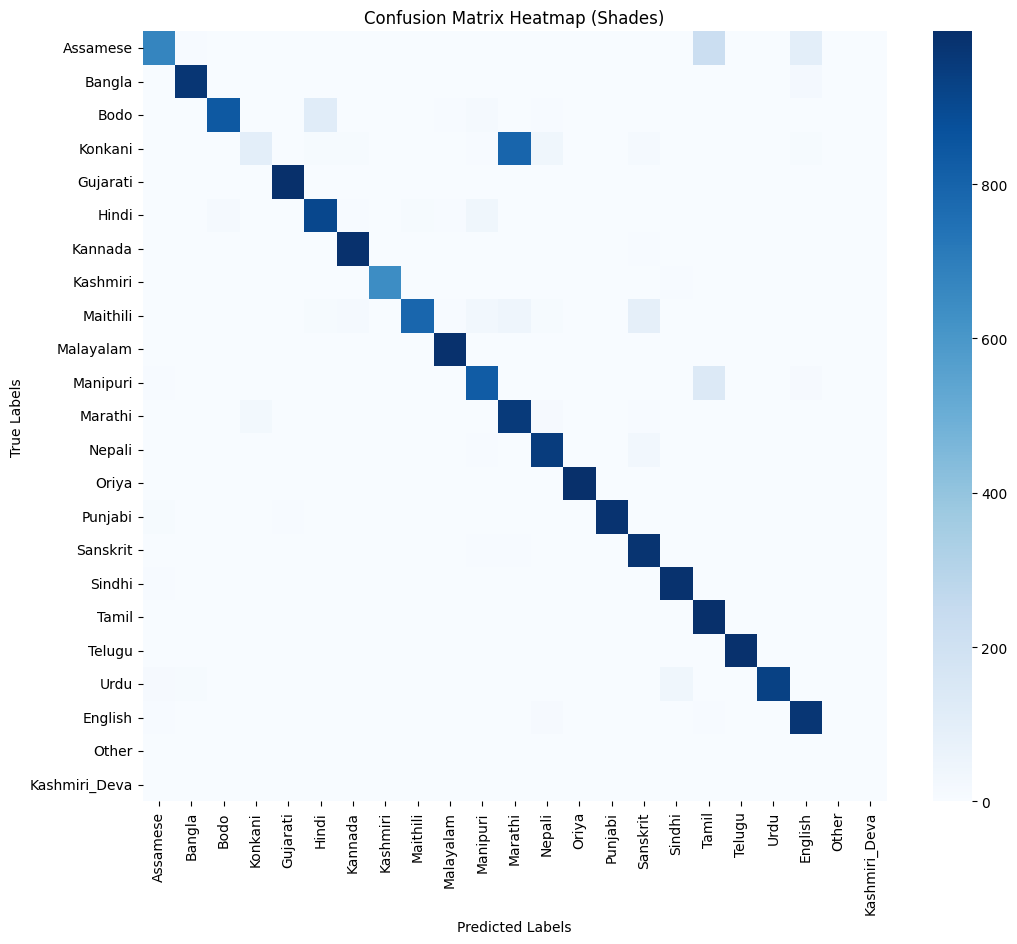

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the confusion matrix from a CSV file
file_path = '/content/IndicLID/results_ntv/confusion_matrix_test_combine.csv'  # Update with your file path
confusion_matrix_df = pd.read_csv(file_path)

# Convert the dataframe to set the first column as an index (assuming it contains row labels)
confusion_matrix = confusion_matrix_df.set_index(confusion_matrix_df.columns[0])

# Plotting the heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=False, cmap="Blues", cbar=True)
plt.title("Confusion Matrix Heatmap (Shades)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [24]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/IndicLID/results_ntv/precision_recall_f1_test_combine.csv'  # Replace with your file path
data = pd.read_csv(file_path)  # Load data into DataFrame
data.columns = [column.upper() for column in data.columns]

# Display the data as a styled table with solid borders
styled_table = data.style.set_table_styles(
    [{'selector': 'table', 'props': [('border-collapse', 'collapse')]},
     {'selector': 'th', 'props': [('border', '1px solid black'), ('padding', '8px')]},
     {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]}]
).set_properties(**{'text-align': 'center'})

# Render the styled table
styled_table


,UNNAMED: 0,PRECISION,RECALL,F1
0,Assamese,0.938547,0.672000,0.783217
1,Bangla,0.981855,0.974975,0.978403
2,Bodo,0.970046,0.842843,0.901982
3,Konkani,0.781250,0.100100,0.177462
4,Gujarati,0.986125,0.995996,0.991036
5,Hindi,0.868195,0.909910,0.888563
6,Kannada,0.966862,0.992993,0.979753
7,Kashmiri,0.996890,0.989198,0.993029
8,Maithili,0.975309,0.790791,0.873411
9,Malayalam,0.981225,0.993994,0.987568
